<a href="https://colab.research.google.com/github/pradeeps1111/DataScience_Assignments/blob/main/Practical_Classification_19_23_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler



from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [6]:
#load the data
train=pd.read_csv("/train.csv")
test=pd.read_csv("/test.csv")
submission=pd.read_csv("/submission.csv")

In [7]:
#info on the dataframe
train.shape,test.shape,submission.shape

((21000, 17), (9000, 16), (9000, 1))

In [14]:
#print(" In train data there are:" ,train.shape[0], "and", train.shape[1], "observations")

print(" In train data there are {} features and {} observations". format(train.shape[1], train.shape[0]))
print(" In test data there are {} features and {} observations". format(test.shape[1], test.shape[0]))

 In train data there are 17 features and 21000 observations
 In test data there are 16 features and 9000 observations


In [15]:
display(train.head(2),test.head(2))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,36,technician,divorced,secondary,no,1842,yes,yes,cellular,5,aug,149,1,-1,0,unknown
1,26,management,married,primary,no,165,no,no,cellular,7,nov,44,2,-1,0,unknown


In [16]:
train.nunique(),test.nunique()

(age            68
 job            12
 marital         3
 education       4
 default         2
 balance      5587
 housing         2
 loan            2
 contact         3
 day            31
 month          12
 duration     1456
 campaign       26
 pdays         236
 previous       15
 poutcome        4
 y_bool          2
 dtype: int64,
 age            61
 job            12
 marital         3
 education       4
 default         2
 balance      3724
 housing         2
 loan            2
 contact         3
 day            31
 month          12
 duration     1117
 campaign       22
 pdays         171
 previous       15
 poutcome        4
 dtype: int64)

In [ ]:
#dummy becnhmark

#private 9.26 public 8.72

In [24]:
train.duplicated().sum()

0

In [17]:
data=pd.concat([train,test])
train.shape, test.shape,data.shape

((21000, 17), (9000, 16), (30000, 17))

In [25]:
cat_cols = data.select_dtypes(include=object).columns
num_cols = data.drop(columns='y_bool').select_dtypes(include=np.number).columns
display(cat_cols,num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

<Axes: ylabel='y_bool'>

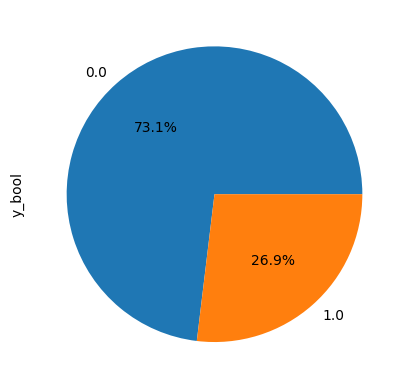

In [27]:
data['y_bool'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='marital'>

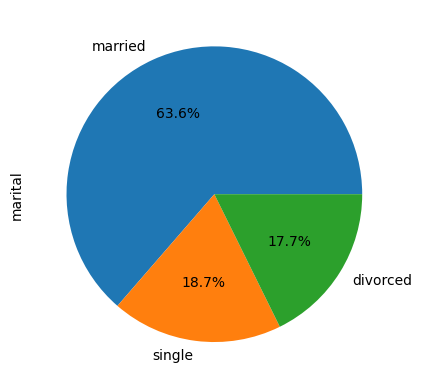

In [28]:
data['marital'].value_counts().plot.pie(autopct='%1.1f%%')

In [29]:
for i in cat_cols:
  print(i)

job
marital
education
default
housing
loan
contact
month
poutcome


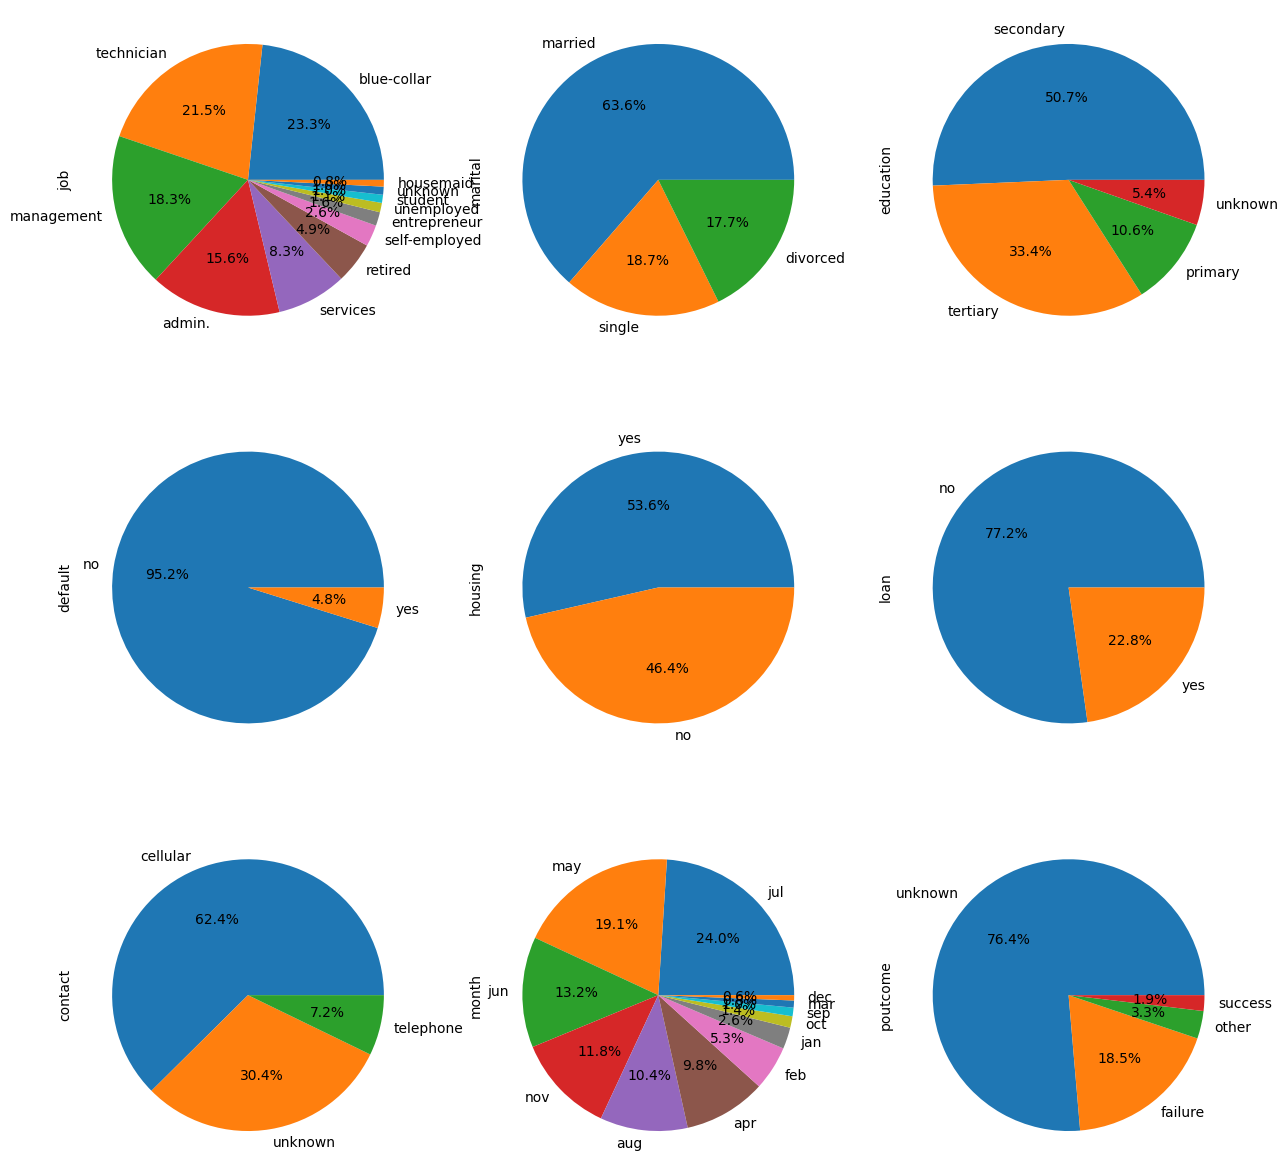

In [36]:
nrows=3
ncols=3
itr=1

plt.figure(figsize=(15,15))

for i in cat_cols:
  plt.subplot(nrows,ncols,itr)
  data[i].value_counts().plot.pie(autopct='%1.1f%%')
  itr+=1
plt.show()


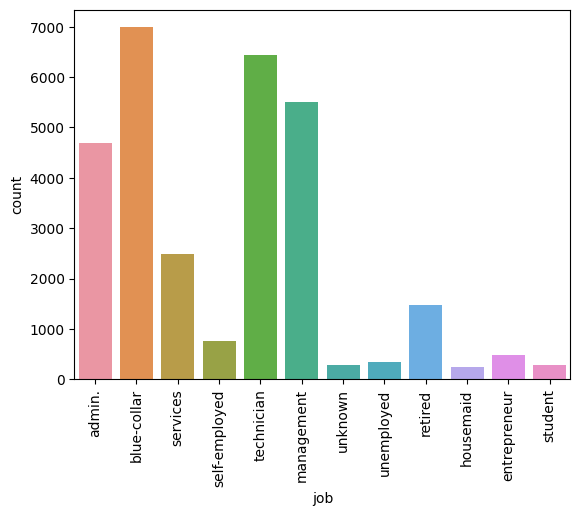

In [45]:
plot=sns.countplot(data=data, x='job')
plt.setp(plot.get_xticklabels(),rotation=90)
plt.show()

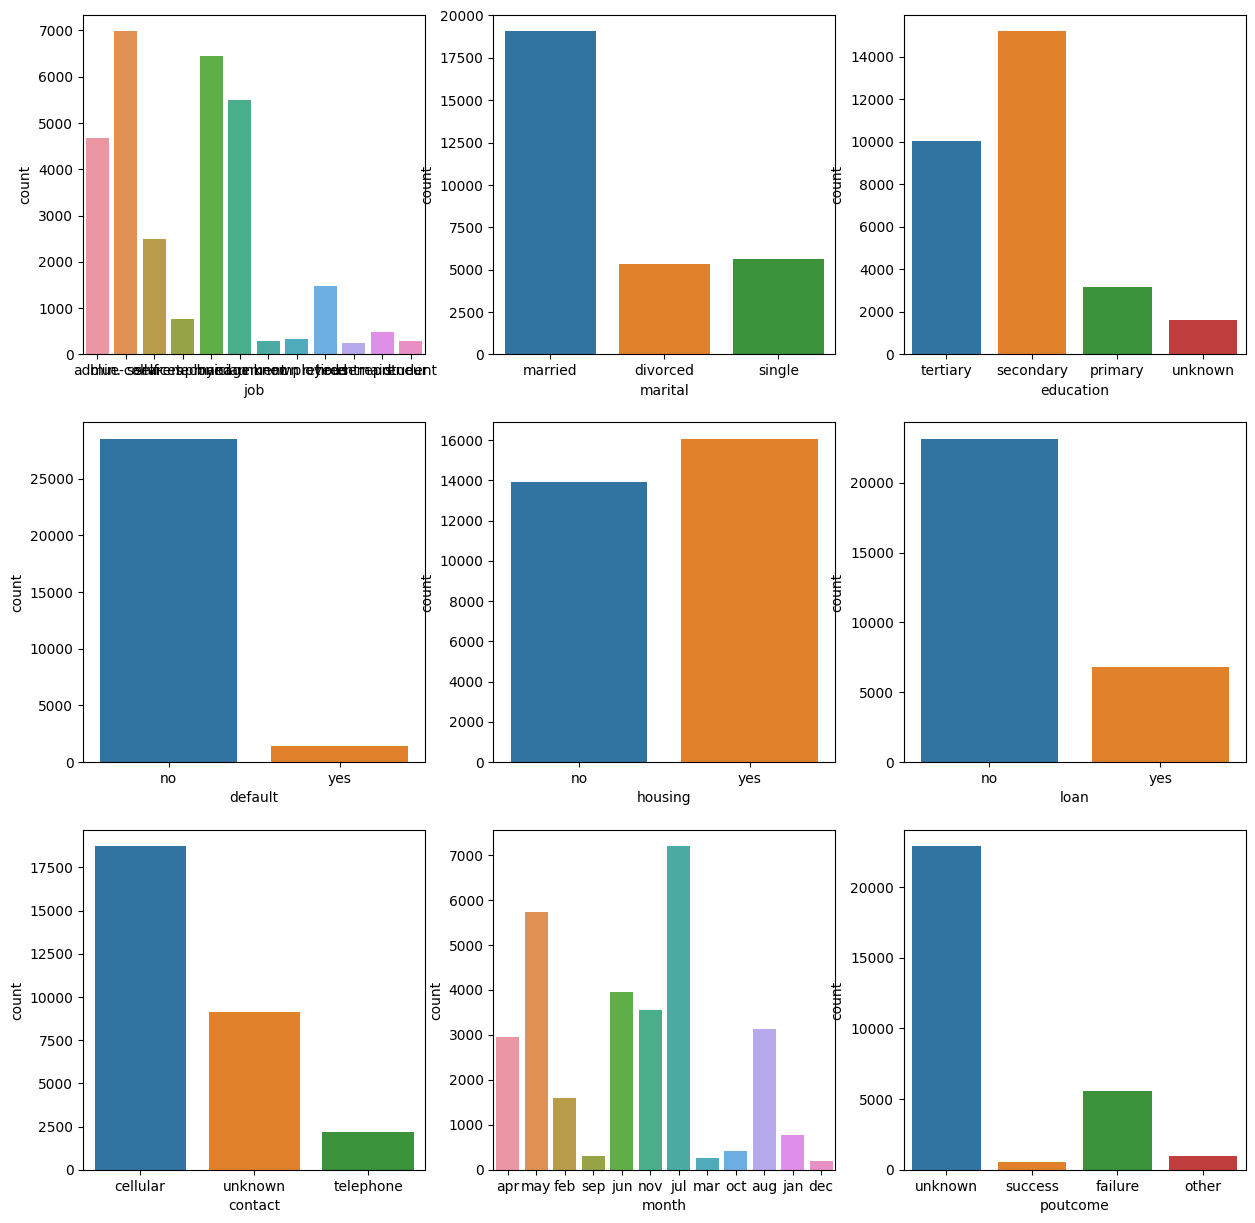

In [38]:
nrows=3
ncols=3
itr=1

plt.figure(figsize=(15,15))

for i in cat_cols:
  plt.subplot(nrows,ncols,itr)
  sns.countplot(data=data, x=i)
  itr+=1
plt.show()

array([<Axes: ylabel='0.0'>, <Axes: ylabel='1.0'>], dtype=object)

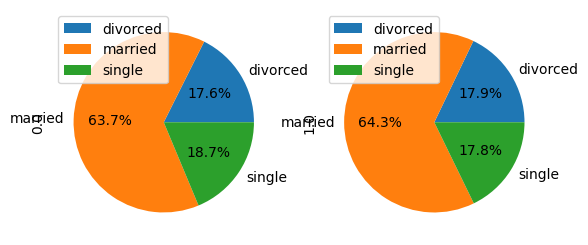

In [44]:
pd.crosstab(data['marital'],data['y_bool']).plot.pie(autopct='%1.1f%%', subplots=True)

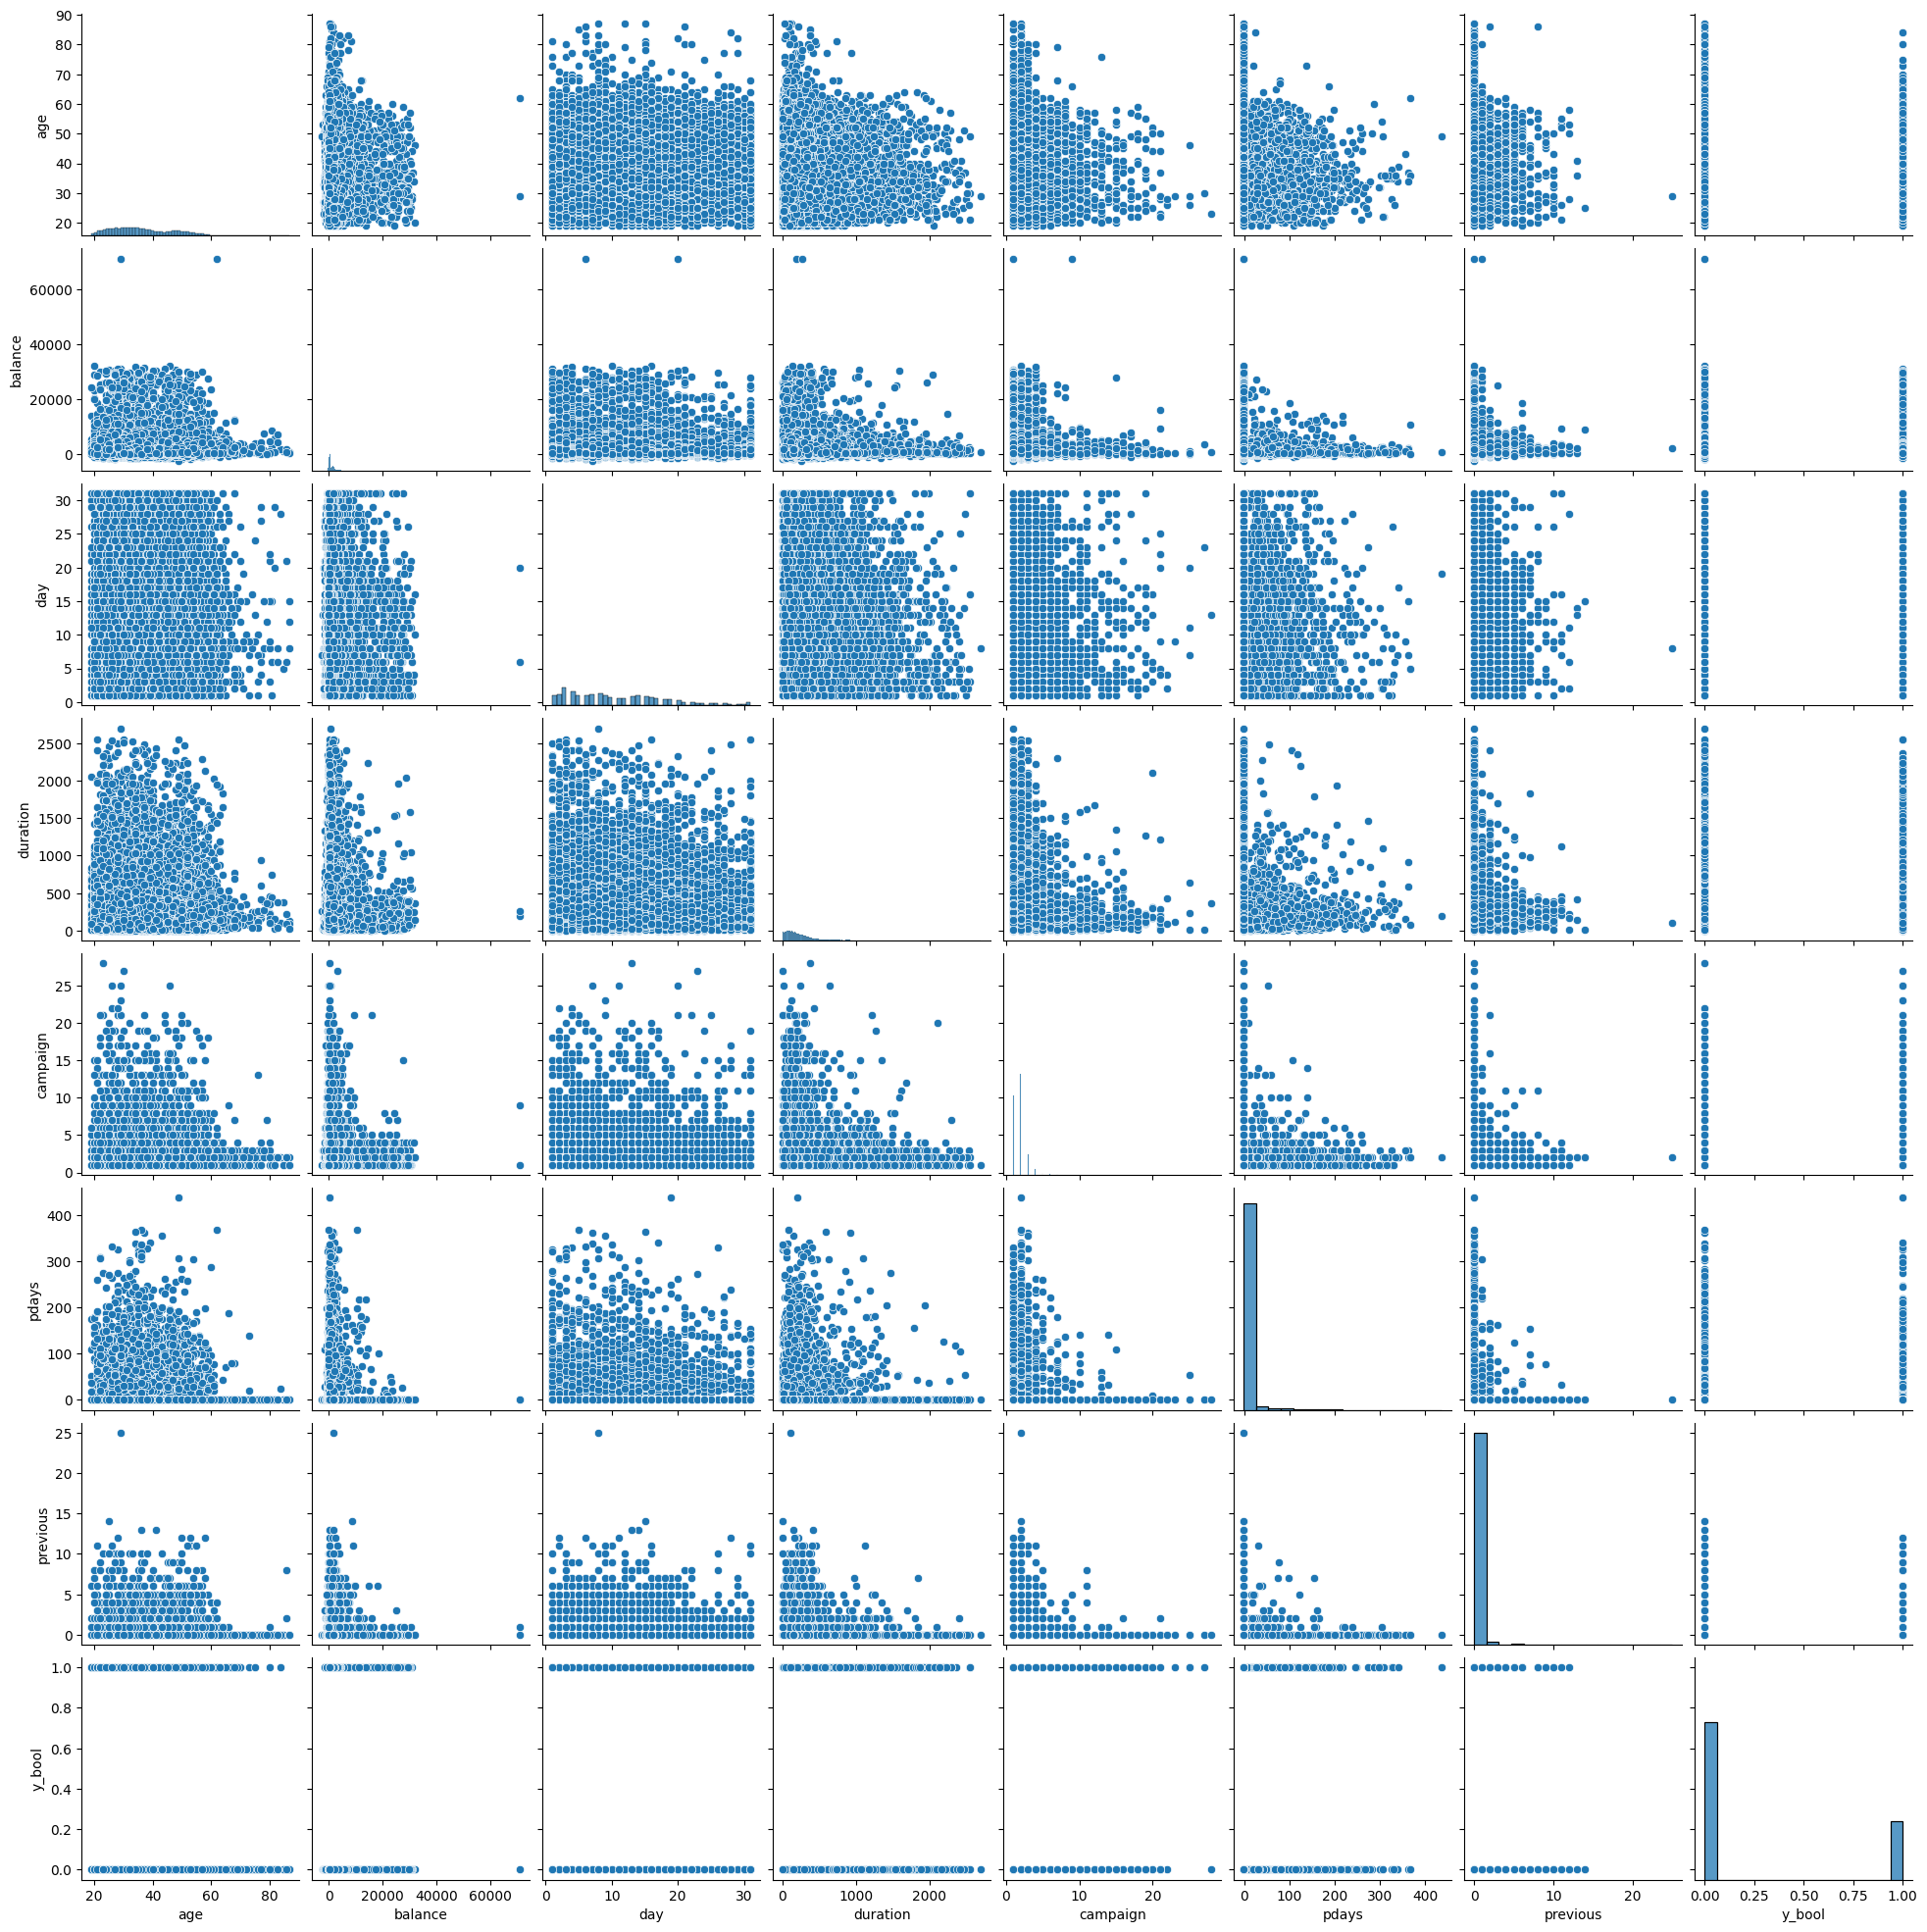

In [46]:
sns.pairplot(data)

In [52]:
sns.heatmap(data, annot=True)

ValueError: ignored

In [51]:
#list comprehension
 [
print(i,data[i].nunique(), data[i].unique())
for i in data.columns if data[i].nunique()<20]

job 12 ['admin.' 'blue-collar' 'services' 'self-employed' 'technician'
 'management' 'unknown' 'unemployed' 'retired' 'housemaid' 'entrepreneur'
 'student']
marital 3 ['married' 'divorced' 'single']
education 4 ['tertiary' 'secondary' 'primary' 'unknown']
default 2 ['no' 'yes']
housing 2 ['no' 'yes']
loan 2 ['no' 'yes']
contact 3 ['cellular' 'unknown' 'telephone']
month 12 ['apr' 'may' 'feb' 'sep' 'jun' 'nov' 'jul' 'mar' 'oct' 'aug' 'jan' 'dec']
previous 16 [ 0  2  5  1  3  4  6  8  9  7 11 12 10 14 13 25]
poutcome 4 ['unknown' 'success' 'failure' 'other']
y_bool 2 [ 0.  1. nan]


[None, None, None, None, None, None, None, None, None, None, None]

In [57]:
cat_encode = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])


num_encode = Pipeline(steps=[
    ('mms', MinMaxScaler())
])




In [58]:
 cat_encode,num_encode

(Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore'))]),
 Pipeline(steps=[('mms', MinMaxScaler())]))

In [59]:
all_cols_link=ColumnTransformer(transformers=[
    ('categ',cat_encode,cat_cols),
    ('numeric',num_encode,num_cols),

])

In [60]:
all_cols_link

ColumnTransformer(transformers=[('categ',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')),
                                ('numeric',
                                 Pipeline(steps=[('mms', MinMaxScaler())]),
                                 Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))])

In [61]:
pipe=Pipeline(steps=[
    ('preprocess',all_cols_link)
])

In [62]:
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categ',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')),
                                                 ('numeric',
                                                  Pipeline(steps=[('mms',
                                                                   MinMaxScaler())]),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))]))])

In [63]:
pipe.fit(data.drop(columns='y_bool'))

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categ',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')),
                                                 ('numeric',
                                                  Pipeline(steps=[('mms',
                                                                   MinMaxScaler())]),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))]))])

In [65]:
#validation


nwdata = data.drop(columns='y_bool').head(1)
nwdata

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown


In [68]:
nw_data_op=pipe.transform(nwdata)
nw_data_op=pd.DataFrame(nw_data_op)

nw_data_op
pipe_enc_cols=pipe['preprocess'].transformers_[0][1]['ohe'].get_feature_names_out(cat_cols)
ncols=np.append(pipe_enc_cols,num_cols)
nw_data_op.columns = ncols
nw_data_op


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.470588,0.035634,0.466667,0.095961,0.037037,0.0,0.0


In [72]:
pipe_mdl = Pipeline([
    ('preprocess',all_cols_link),
    ('model', LogisticRegression())
])


pipe_mdl



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categ',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')),
                                                 ('numeric',
                                                  Pipeline(steps=[('mms',
                                                                   MinMaxScaler())]),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))])),
                ('model', LogisticRegression())])

In [73]:
X=train.drop(columns='y_bool')
y=train[['y_bool']]

In [97]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import log_loss, confusion_matrix, classification_report,accuracy_score



from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier






In [79]:
train_X, val_X, train_y,val_y = train_test_split(X,y,test_size=0.2,random_state=42)
train_X.shape, val_X.shape,train_y.shape,val_y.shape

((16800, 16), (4200, 16), (16800, 1), (4200, 1))

In [80]:
pipe_mdl.fit(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categ',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')),
                                                 ('numeric',
                                                  Pipeline(steps=[('mms',
                                                                   MinMaxScaler())]),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))])),
                ('model', LogisticRegression())])

In [88]:
pred_val_y=pipe_mdl.predict(val_X)
print('val log_loss:', log_loss(val_y, pred_val_y))
print('val accuracy_score:', accuracy_score(val_y, pred_val_y))
print('val conf.matrix: \n', confusion_matrix(val_y, pred_val_y))
print('val classification: \n', classification_report(val_y, pred_val_y))

val log_loss: 9.542986325880541
val accuracy_score: 0.7352380952380952
val conf.matrix: 
 [[3088    0]
 [1112    0]]
val classification: 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      3088
           1       0.00      0.00      0.00      1112

    accuracy                           0.74      4200
   macro avg       0.37      0.50      0.42      4200
weighted avg       0.54      0.74      0.62      4200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


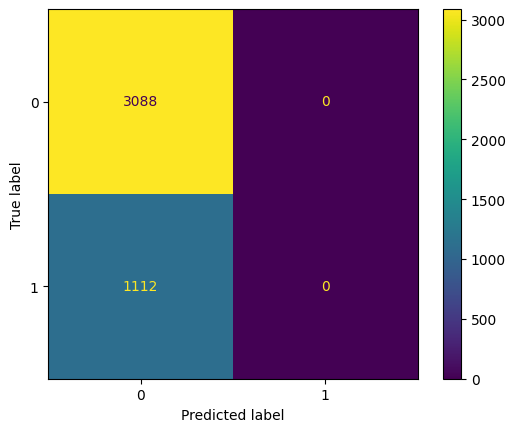

In [86]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(val_y,pred_val_y)

In [93]:
pipe_mdl.fit(X,y)
lr_pred_test_y = pipe_mdl.predict_proba(test)

submission = pd.read_csv("/submission.csv")
submission['y_bool'] = lr_pred_test_y
submission.iloc[0:,0].to_csv('/sub_logreg.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
pipe_lr = Pipeline([
    ('preprocess',all_cols_link),
    ('lr',LogisticRegression())
])

pipe_dt = Pipeline([
    ('preprocess',all_cols_link),
    ('dt',DecisionTreeClassifier())
])

pipe_knn = Pipeline([
    ('preprocess',all_cols_link),
    ('knn',KNeighborsClassifier())
])

pipe_rf = Pipeline([
    ('preprocess',all_cols_link),
    ('rf',RandomForestClassifier())
])

In [116]:
grid_param_lr = [{'lr__penalty':['l2']}]
grid_param_knn = [{'knn__n_neighbors':[10,15]}]
grid_param_dt = [{'dt__max_depth':[5,10]}]
grid_param_rf = [{'rf__max_depth':[5,10]}]






In [117]:
# GridSearchCV
gridsrc_lr = GridSearchCV(pipe_lr, param_grid=grid_param_lr, scoring='neg_log_loss', cv=2)
gridsrc_knn = GridSearchCV(pipe_knn, param_grid=grid_param_knn, scoring='neg_log_loss', cv=2)
gridsrc_dt = GridSearchCV(pipe_dt, param_grid=grid_param_dt, scoring='neg_log_loss', cv=2)
gridsrc_rf = GridSearchCV(pipe_rf, param_grid=grid_param_rf, scoring='neg_log_loss', cv=2)

In [118]:
result_acc = {}
models = []
iter_mdl = [gridsrc_lr,  gridsrc_knn, gridsrc_dt, gridsrc_rf]
mdl_idx = {0:'Log_reg', 1:'Knn', 2:'DecisionTree', 3:'RandomForest'}

for id, model in enumerate(iter_mdl):
  model.fit(train_X, train_y)
  print(model.best_params_)
  print(model.best_score_)

  models.append(model.best_estimator_)
  result_acc[id] = model.best_score_

{'lr__penalty': 'l2'}
-0.5831963753563874
{'knn__n_neighbors': 15}
-0.6921972609608253
{'dt__max_depth': 5}
-0.6688701135080025
{'rf__max_depth': 5}
-0.5820340310863946


In [119]:
pd.DataFrame(list(zip(mdl_idx.values(), result_acc.values())), columns=['Model','Accuracy'])

,Model,Accuracy
0,Log_reg,-0.583196
1,Knn,-0.692197
2,DecisionTree,-0.668870
3,RandomForest,-0.582034
